# Statistics

In [87]:
%pip install sidetable

import numpy as np
import pandas as pd

import sidetable
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

Note: you may need to restart the kernel to use updated packages.


In [151]:
df_tips = sns.load_dataset('tips')
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Population and sample

<br/>

| Metric             | Population parameter   | Sample Statistic   |
|:-------------------|:-----------------------|:-------------------|
| size               | $N$                    | $n$                |
| mean               | $\mu$                  | $\bar{x}$          |
| variance           | $\sigma^2$             | $s^2$              |
| standard deviation | $\sigma$               | $s$                |
| correlation        | $\rho$                 | $r$                |

In [152]:
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [153]:
df_tips_sample = df_tips.sample(50)
print(df_tips_sample.shape)
df_tips_sample.head()

(50, 7)


,total_bill,tip,sex,smoker,day,time,size
131,20.27,2.83,Female,No,Thur,Lunch,2
216,28.15,3.00,Male,Yes,Sat,Dinner,5
71,17.07,3.00,Female,No,Sat,Dinner,3
234,15.53,3.00,Male,Yes,Sat,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2


In [154]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [157]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [158]:
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Univariate Analysis

###### Mean
<br/>

**formula**:

$$
\text{Mean} = \bar{x} = \frac{\sum_{i=1}^n{x_i}}{n}
$$

In [159]:
df_tips['tip'].mean()

2.9982786885245902

In [160]:
df_tips['tip'].agg('mean')

2.9982786885245902

In [161]:
np.mean(df_tips['tip'])

2.9982786885245902

In [162]:
np.sum(df_tips['tip']) / len(df_tips['tip'])

2.99827868852459

$$
\text{Weighted Mean} = \bar{x}_w = \frac{\sum_{i=1}^n{x_iw_i}}{\sum_{i=1}^n{w_i}}
$$

In [163]:
np.average(df_tips['tip'], weights=df_tips['size'])

3.2478309409888357

$$
\text{Trimmed Mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p}{x_i}}{n - 2p}
$$

In [164]:
values = df_tips['tip'].sort_values().reset_index(drop=True)
values

0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64

In [165]:
p = 10
n = len(values[p:-p])
values[p:-p].sum() / (n - 2*p)

3.1851470588235293

In [166]:
values = df_tips['tip'].sort_values().reset_index(drop=True)

p = 10
values[p:-p].sum() / (values.shape[0] - 2*p)
# values[p:-p].sum() / values[10:-10].shape[0]

2.9007589285714284

In [167]:
stats.trim_mean(values, .1)

2.842704081632653

In [168]:
# F1-score 
stats.hmean(values)

2.482252914784503

<br/>

**Median:**

Se n é ímpar:
$$\text{Med} = X_{(n+1)/2}$$

Se n é par:
$$\text{Med} = \frac{X_{n/2}+X_{n/2+1}}{2}$$

In [169]:
values = [4,50,3,1,2]

In [170]:
sorted_values = sorted(values)
sorted_values

[1, 2, 3, 4, 50]

In [171]:
n = len(sorted_values)
pos = int((n+1)/2 - 1)
values[pos]

3

In [172]:
values = np.array([8,6,7,6,85,10])
sorted_values = np.sort(values)
sorted_values

array([ 6,  6,  7,  8, 10, 85])

In [173]:
n = len(sorted_values)
pos = np.array([n/2, n/2+ 1]) - 1
sorted_values[pos.astype(int)].mean()

7.5

In [174]:
np.median(sorted_values)

7.5

In [175]:
df_tips['tip'].agg('median')

2.9

##### Mode

In [176]:
df_tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

##### quartiles

In [177]:
np.median(df_tips['tip'])

2.9

In [178]:
df_tips['tip'].quantile([.25, .5, .75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

##### Decis

In [179]:
decis = np.arange(1,11)/10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

##### Percentil

In [180]:
df_tips['tip'].quantile([.01, 0.99])

0.01    1.0000
0.99    7.2145
Name: tip, dtype: float64

In [181]:
np.quantile(df_tips['tip'], [[.01, 0.99]])

array([[1.    , 7.2145]])

In [182]:
np.percentile(df_tips['tip'], [[1, 99]])

array([[1.    , 7.2145]])

In [183]:
df_tips.describe(percentiles=[0.01, 0.05, 0.995, 0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


#### Amplitude

$$
\text{Amplitude} = \text{Range} = \text{max}(x) - \text{min}(x)
$$

In [184]:
# custom numeric variable
df_tips['tip'].max() - df_tips['tip'].min()


9.0

In [185]:
# all numerical variables
df_tips.select_dtypes('number').apply(lambda x: x.max() - x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

#### variance

$$
s^2 = \frac{(x_i - \bar{x})^2}{n-1}
$$

In [186]:
df_tips['tip'].var()

1.9144546380624725

In [187]:
np.var(df_tips['tip'], ddof=1)

1.9144546380624725

#### Standard deviation

$$
s = \sqrt{s^2} = \sqrt{\frac{(x_i - \bar{x})^2}{n-1}}
$$

In [188]:
np.sqrt(df_tips['tip'].var())

1.3836381890011826

In [189]:
df_tips['tip'].std()

1.3836381890011826

### Frequency Table

In [190]:
# Absolute frequency table
df_tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [191]:
# Relative frequency table
df_tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [192]:
# Relative frequency table (dataframe)
(
  df_tips['day']
 .value_counts(normalize=True)
 .to_frame('count_pct')
 .rename_axis('day')
 .reset_index()
)

,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [193]:
# sidetable
df_tips.stb.freq(['day'])

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


### pie chart

In [194]:
df_counts = df_tips.stb.freq(['day'])
df_counts

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


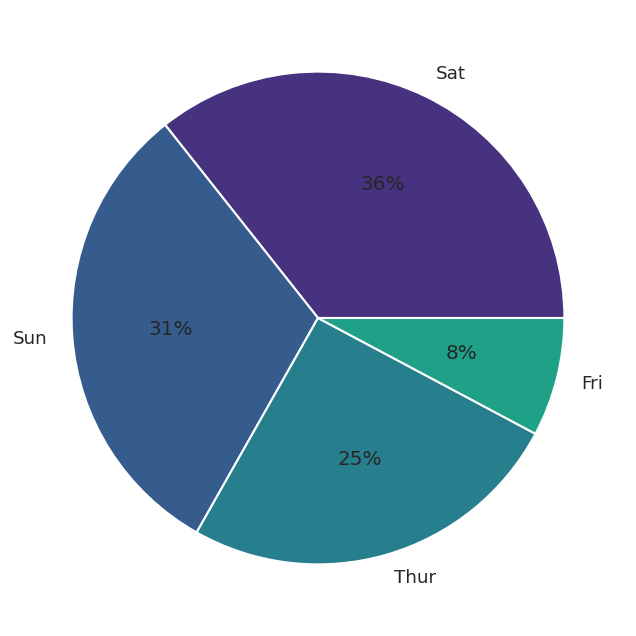

In [195]:
plt.pie(x=df_counts['count'], labels=df_counts.day, autopct='%.0f%%');

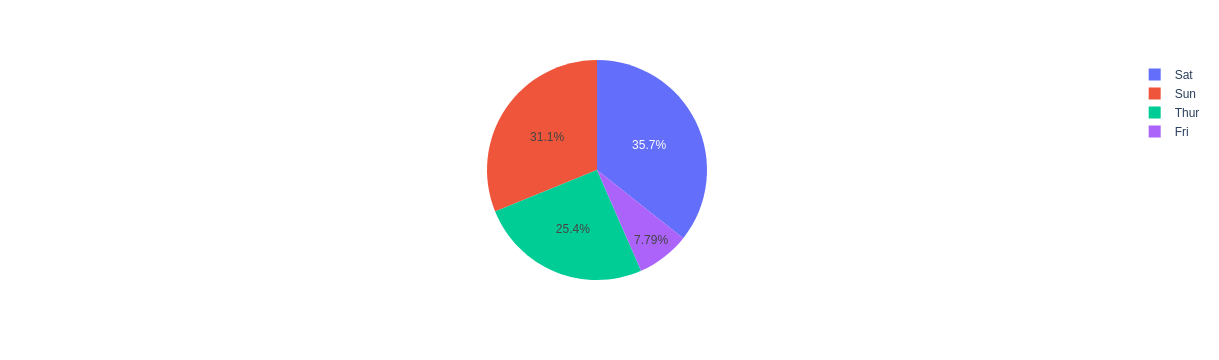

In [196]:
px.pie(df_counts, names='day', values='count')

### bar chart

In [197]:
df_counts.head()

,day,count,percent,cumulative_count,cumulative_percent
0,Sat,87,35.655738,87,35.655738
1,Sun,76,31.147541,163,66.803279
2,Thur,62,25.409836,225,92.213115
3,Fri,19,7.786885,244,100.000000


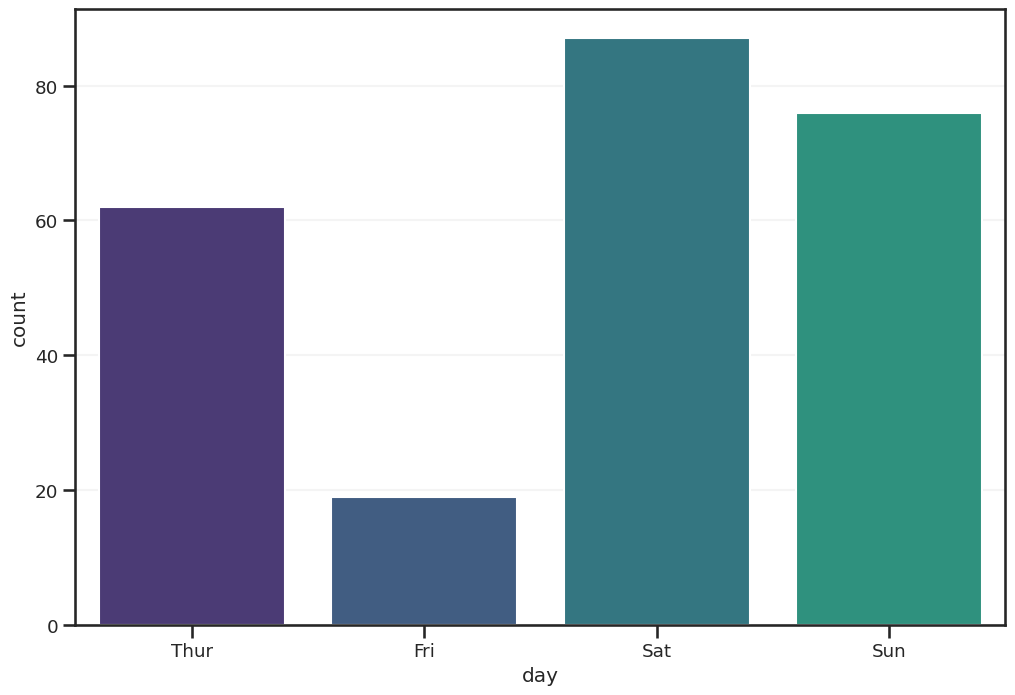

In [198]:
sns.barplot(data=df_counts, x='day', y='count');

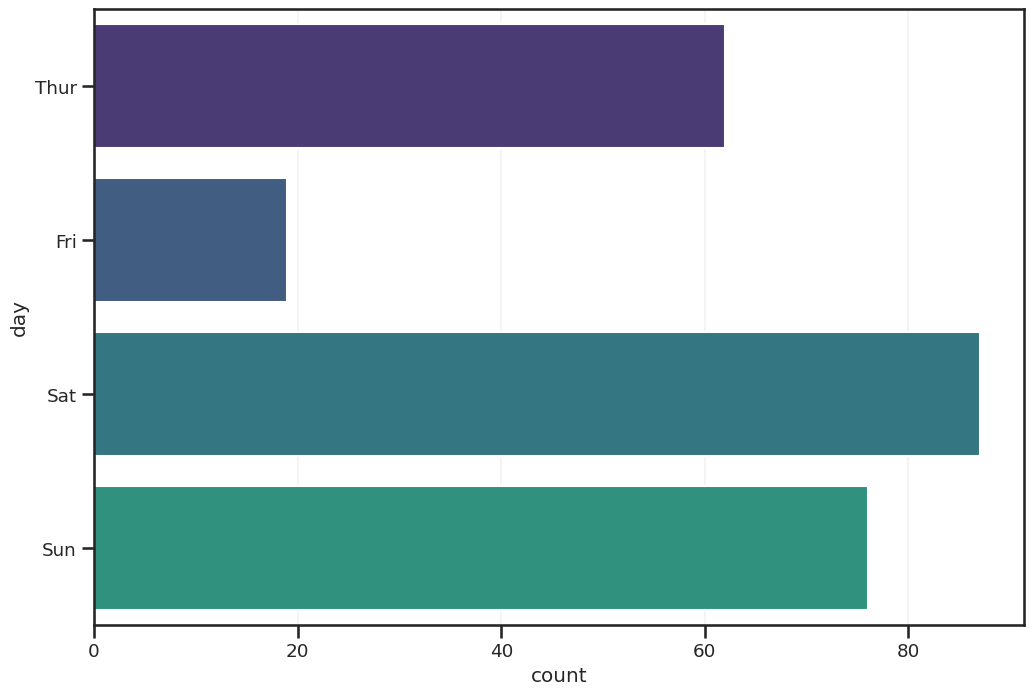

In [199]:
sns.barplot(data=df_counts, y='day', x='count');

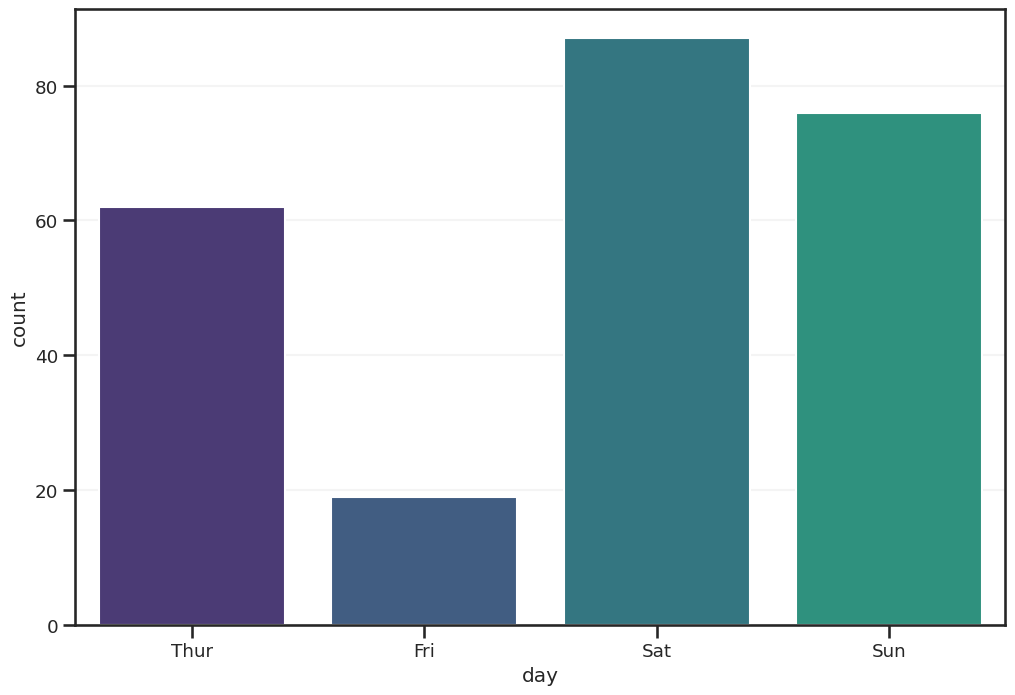

In [200]:
sns.countplot(data=df_tips, x='day');

# Bivariate Analysis

In [201]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Covariance

$$
cov_{x,y} = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{n - 1}
$$

In [202]:
np.cov(df_tips['total_bill'], df_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [203]:
pd.DataFrame(
    data=np.cov(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


### Correlation

$$
r = \frac{\sum{(x_i - \bar{x}) (y_i-\bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2} }}
$$

In [204]:
np.corrcoef(df_tips['total_bill'], df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [205]:
pd.DataFrame(
    data=np.corrcoef(df_tips['total_bill'], df_tips['tip']),
    index=['total_bill','tip'],
    columns=['total_bill','tip'],
)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [206]:
# Pandas correlation
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Association Measures

### Chi-Square

It measures association between two categorical variables:

$$
\chi^2 = \sum{\frac{(O_i - E_i)^2}{E_i}}
$$

In [207]:
crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])
crosstab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [208]:
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

In [209]:
print(chi2, p)

0.0 1.0


### Cramer's V

Membership coefficient based on $\chi^2$ ranging from 0 to 1, with 0 minimum memberships and 1 maximum membership:

$$
V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}}
$$

In [210]:
stats.contingency.association(crosstab)

0.0028159517336962033

## Charts

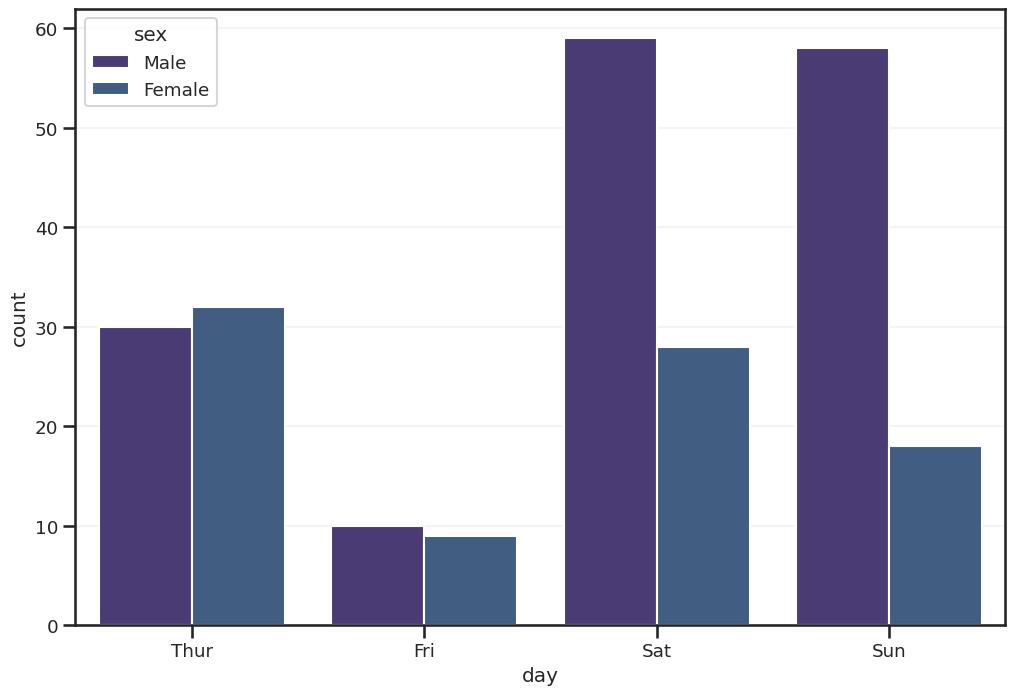

In [211]:
sns.countplot(data=df_tips, x='day', hue='sex');

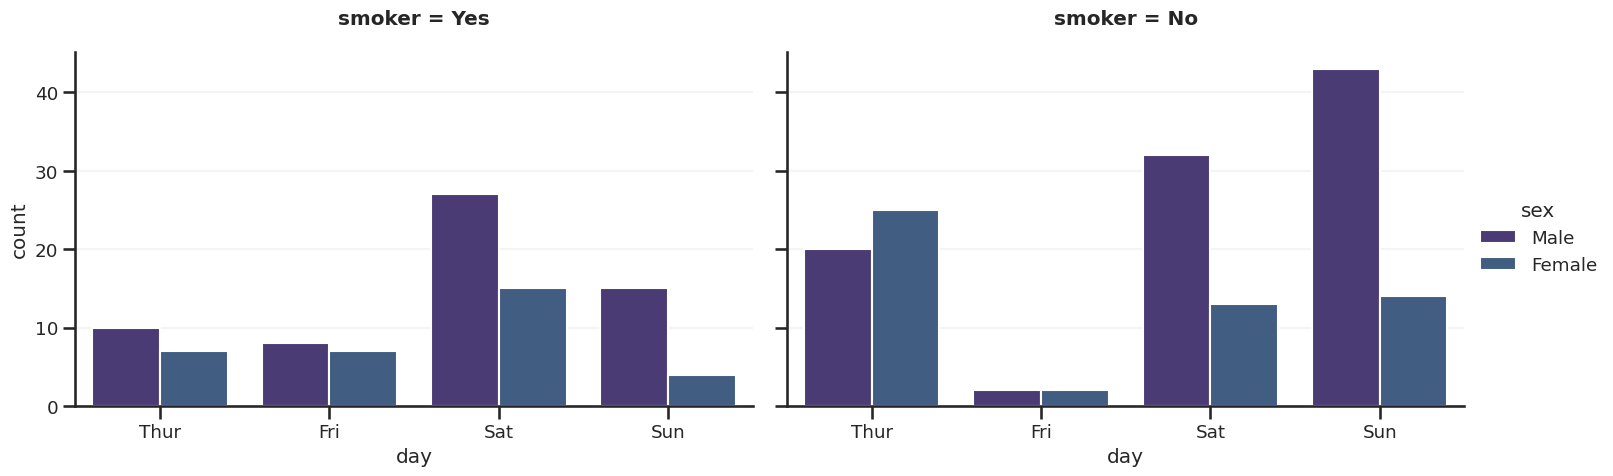

In [212]:
sns.catplot(data=df_tips, x='day', hue='sex', kind='count', col='smoker', aspect=1.5);

In [213]:
df_counts = df_tips.stb.freq(['day','sex'])
df_counts

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


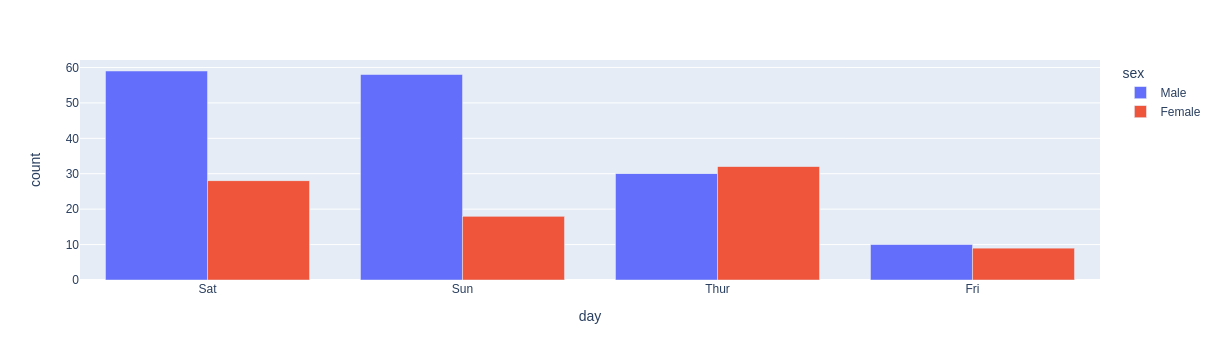

In [214]:
px.bar(df_counts, x='day', y='count', color='sex', barmode='group')

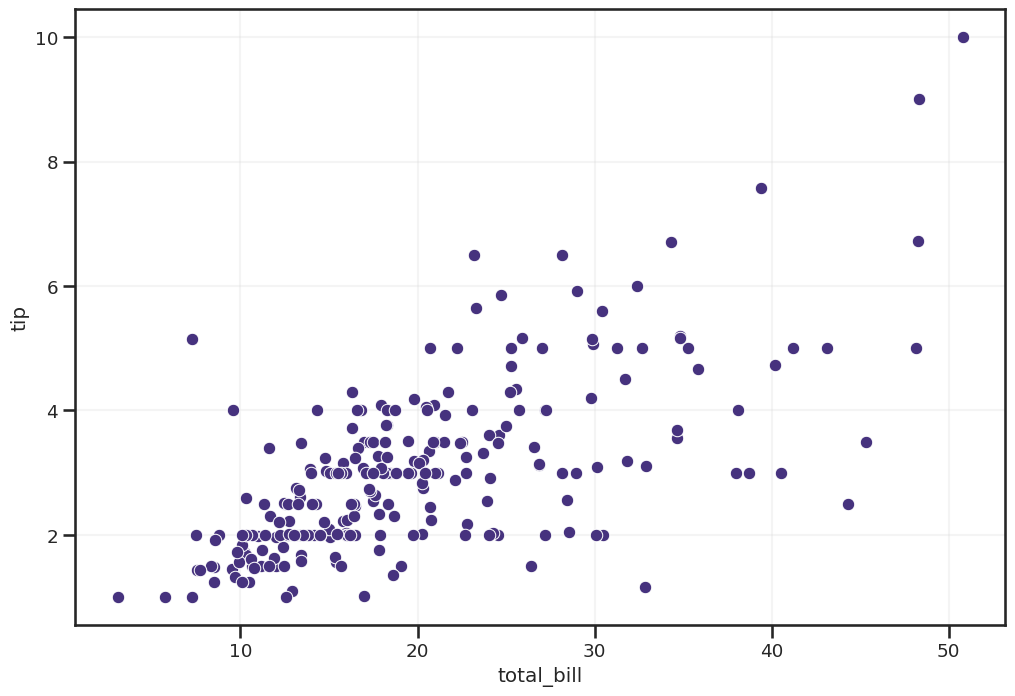

In [215]:
# Scatterplot
sns.scatterplot(data=df_tips, x='total_bill', y='tip');

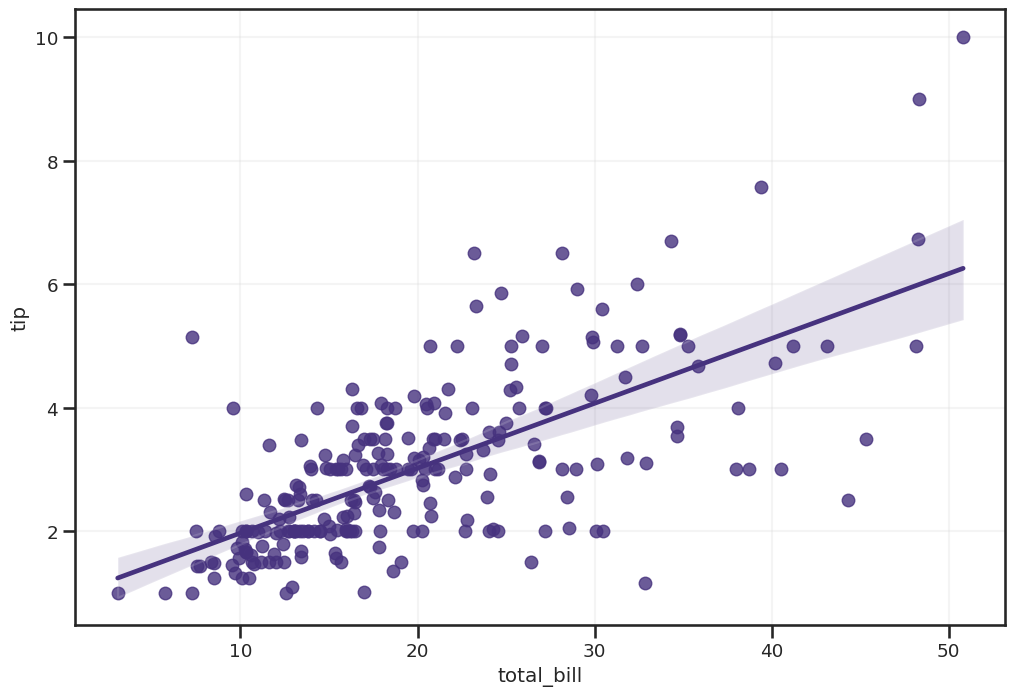

In [216]:
# Lmplot
sns.regplot(data=df_tips, x='total_bill', y='tip');

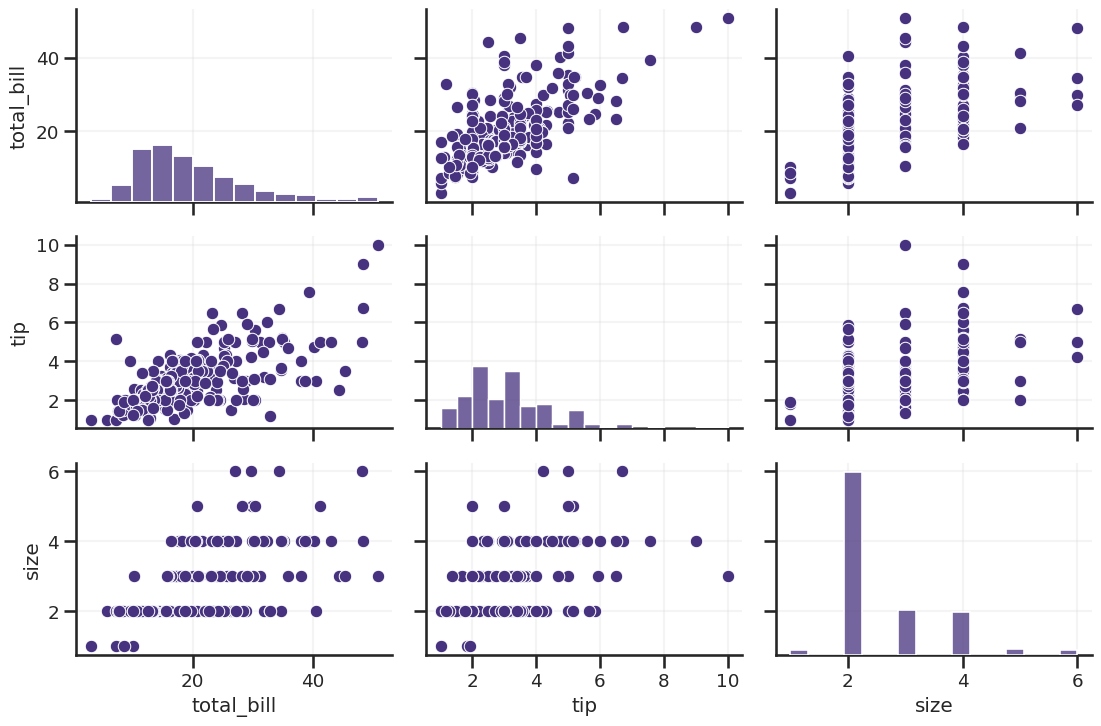

In [217]:
# Pairplot
sns.pairplot(data=df_tips, aspect=1.5)
plt.tight_layout()
plt.show()

In [218]:
# Heatmap (correlation)
dfc = df_tips.corr()
dfc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


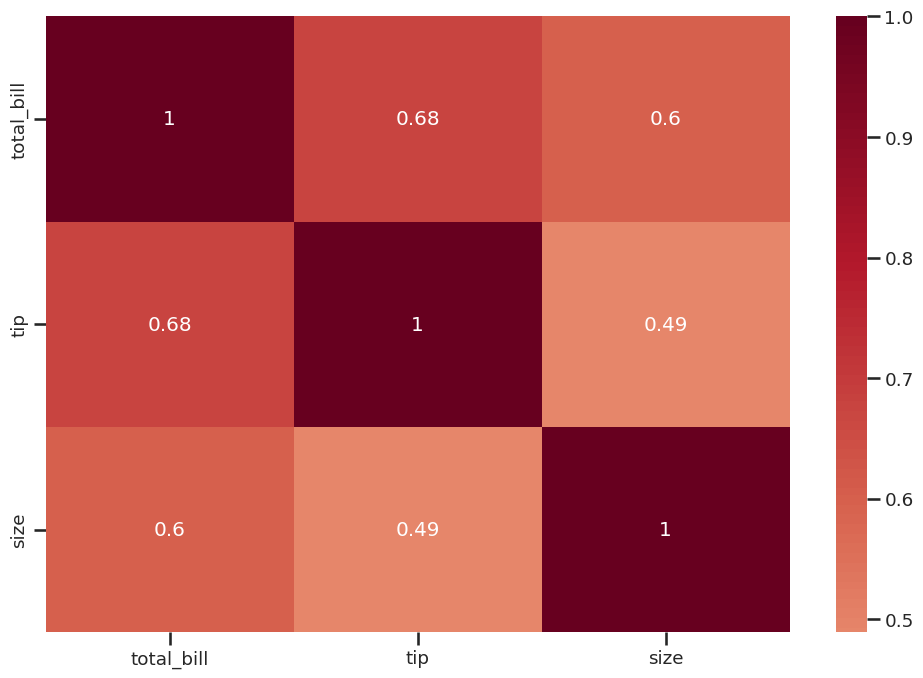

In [219]:
sns.heatmap(dfc, annot=True, cmap='RdBu_r', center=0);

### Numerical + categorical variables

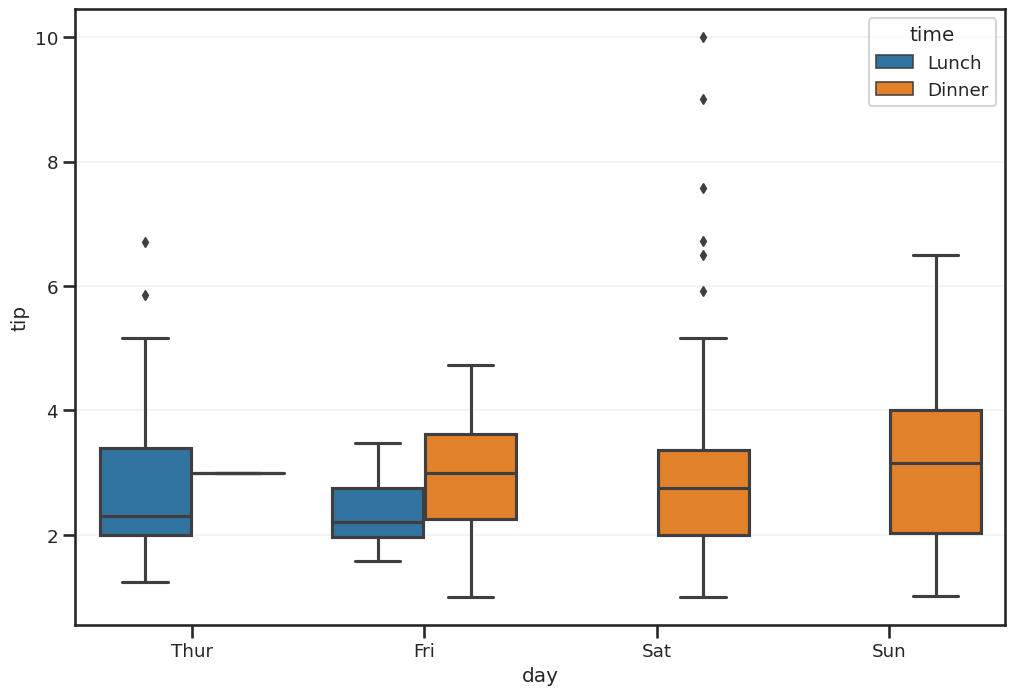

In [220]:
# Boxplot day - total_bill
sns.boxplot(data=df_tips, x='day', y='tip', hue='time', palette='tab10');

<AxesSubplot:xlabel='day', ylabel='tip'>

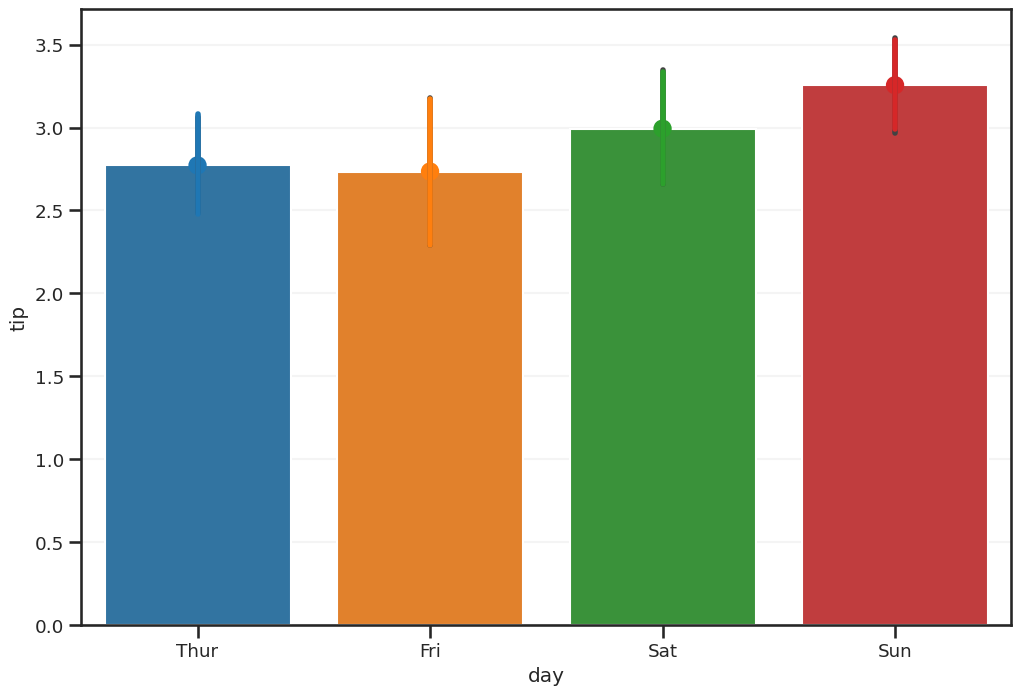

In [221]:
# Barplot/pointplot day - total_bill
sns.barplot(data=df_tips, x='day', y='tip', palette='tab10')
sns.pointplot(data=df_tips, x='day', y='tip', palette='tab10')

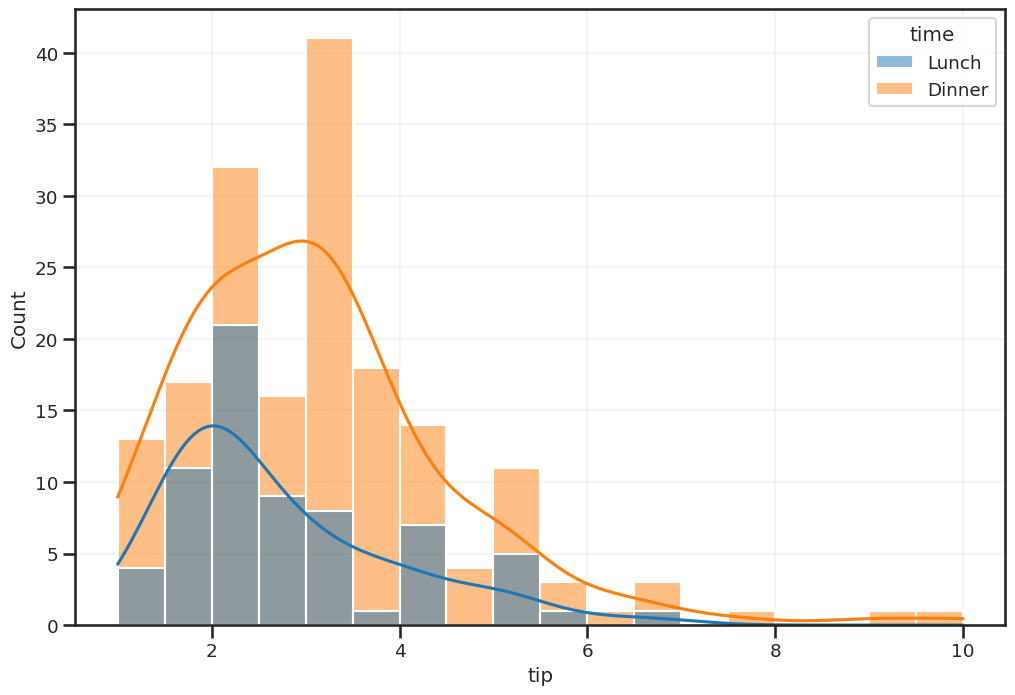

In [222]:
sns.histplot(data=df_tips, x='tip', hue='time', palette='tab10', kde=True);